**Installing the Libraries**

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


**Importing the Dataset**

In [125]:
data = pd.read_csv('insurance.csv')

print(data.shape)

data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [29]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [0]:
pip install pandas-profiling

In [10]:
from pandas_profiling import ProfileReport
ProfileReport(data)

Number of variables,7
Number of observations,1338
Total Missing (%),0.0%
Total size in memory,73.2 KiB
Average record size in memory,56.1 B
Numeric,4
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Univariate Analysis

### Classifing numerical and categorical data

In [0]:
columns=list(data.columns)
num=[]
cat=[]
#Classifing numerical and categorical data into num[] and cat[] lists
for i in columns:
    if((np.array(data[i].unique()).shape[0]>30 and data[i].dtype in['int64','float64'])):
      num.append(i)  #appending to num list
    else:
      cat.append(i)  #appending to cat list

In [27]:
num

['age', 'bmi', 'charges']

## Histogram and Box plots for Numerical variables


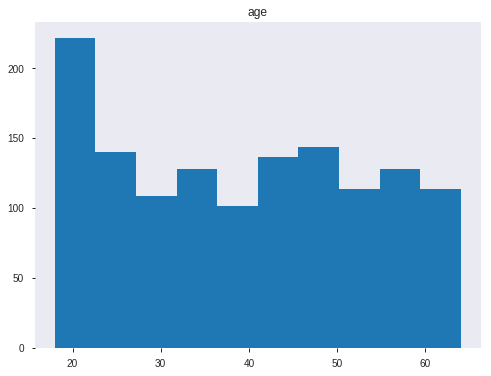

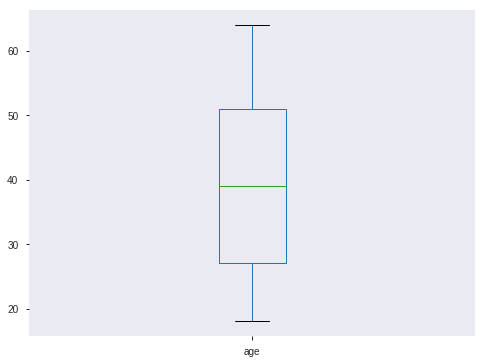

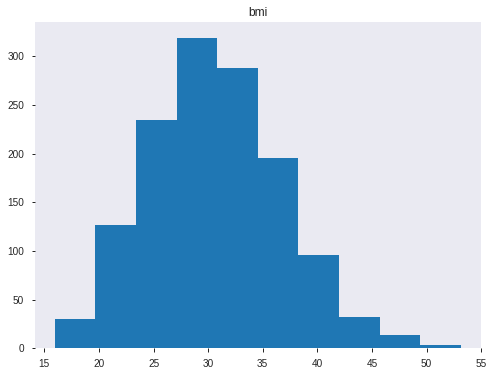

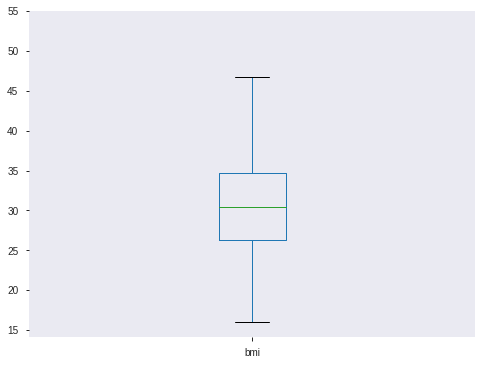

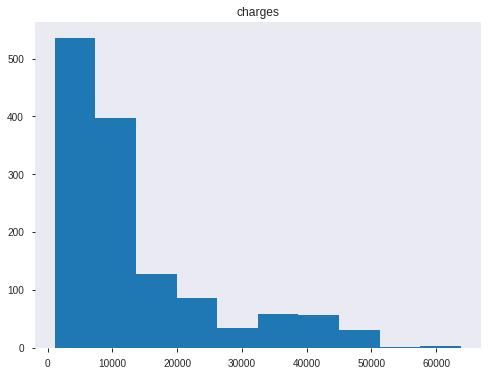

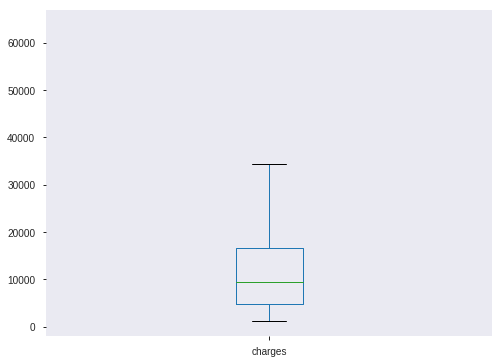

In [28]:
for j in num:
  data.hist(column=j,grid=False,figsize=(8,6))
  #plt.savefig('%s_hist.png'%j)
  plt.show() 
  data.boxplot(column=j,grid=False,figsize=(8,6))
  plt.show()

In [36]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [38]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [40]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [41]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [42]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [43]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## barplots for Categorical variables

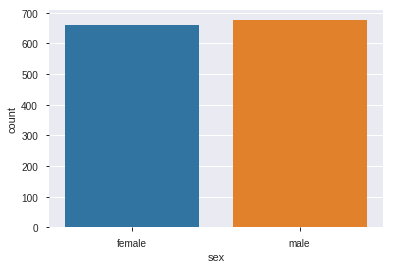

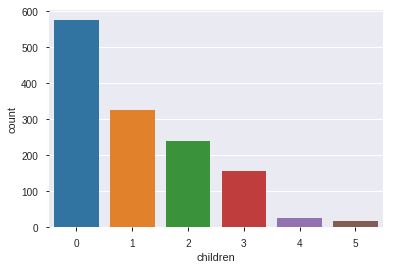

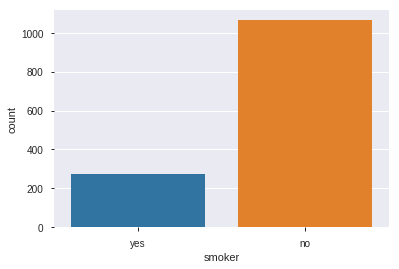

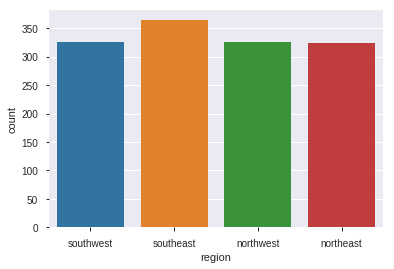

In [30]:
import seaborn as sns
for g in cat:
        sns.countplot(data[g])
        #plt.savefig(str(g)+'_barplot.png')
        
        plt.show()

## Feature Engineering

In [0]:
df = data.copy()
df['bmi_30'] = np.where(df['bmi']>=30,'yes','no')


In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_30
0,19,female,27.900,0,yes,southwest,16884.92400,no
1,18,male,33.770,1,no,southeast,1725.55230,yes
2,28,male,33.000,3,no,southeast,4449.46200,yes
3,33,male,22.705,0,no,northwest,21984.47061,no
4,32,male,28.880,0,no,northwest,3866.85520,no


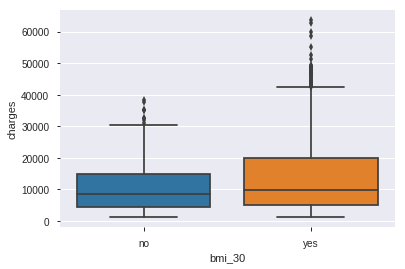

In [34]:
sns.boxplot(x='bmi_30',y='charges',data=df)

The idea behind deriving a new variable bmi_30 is that, 30 is the bmi threshold for obesity and we all know that obesity plays a huge role in a person’s health. As we can see, although obese and non-obese people has the same median medical expenses, their average expenditure differ by almost USD 5000.



In [0]:
df['age_square']= df['age']**2

create a new variable age_square which is basically age squared. Like I’ve said earlier, relationship between age and charges might not be totally linear so the idea behind this is to include the variable age_square to deal with this non-linearity in our model. 

# **Bivariate Analysis**

In [44]:
(pd.crosstab(data['charges'],data['region'])).describe()


region,northeast,northwest,southeast,southwest
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,0.242334,0.243082,0.272251,0.243082
std,0.428655,0.430845,0.445285,0.429104
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,1.000000,2.000000,1.000000,1.000000


In [45]:
(pd.crosstab(data['charges'],data['smoker'])).describe()


smoker,no,yes
count,1337.000000,1337.000000
mean,0.795812,0.204936
std,0.405110,0.403806
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,2.000000,1.000000


Text(0.5, 1.0, 'Age vs Charges')

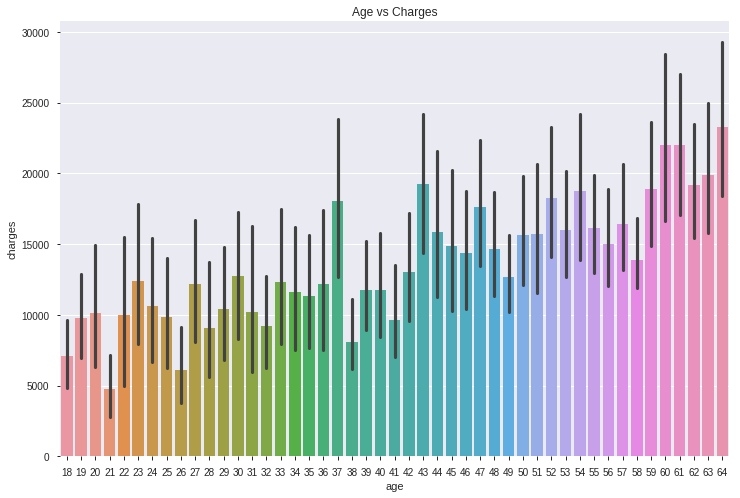

In [46]:
# Age vs Charges
# the more the age the more will be insurance charge (roughly estimated)

plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = data)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

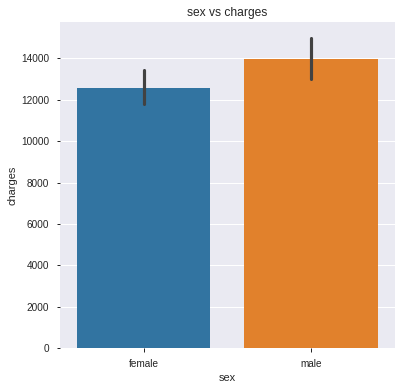

In [47]:
# sex vs charges
# males have slightly greater insurance charges than females in general

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = data)

plt.title('sex vs charges')

Text(0.5, 1.0, 'children vs charges')

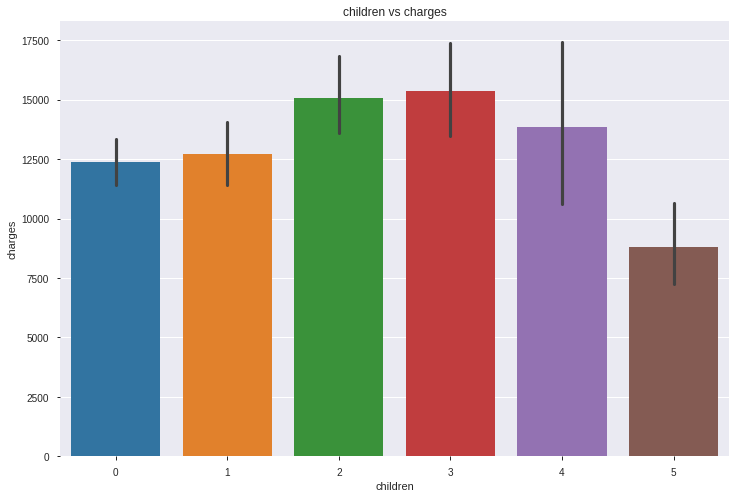

In [48]:
# children vs charges
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = data)

plt.title('children vs charges')

Text(0.5, 1.0, 'region vs charges')

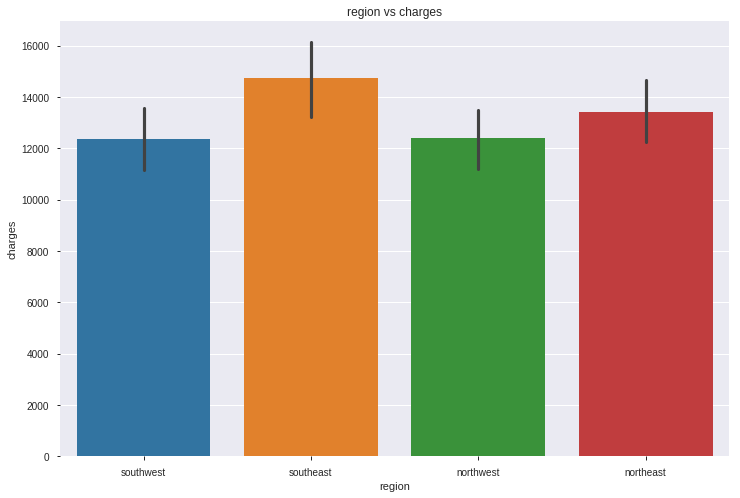

In [49]:
# region vs charges
# From the graph we can see that the region actually does not play any role in determining the insurance charges

plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = data)

plt.title('region vs charges')

Text(0.5, 1.0, 'smoker vs charges')

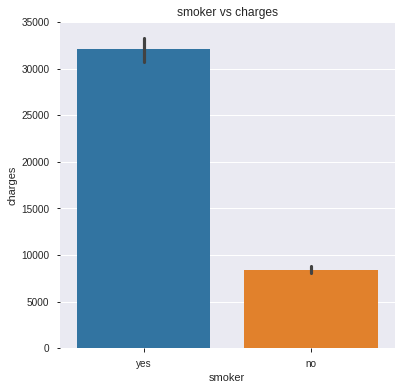

In [50]:
# smoker vs charges
# from the graph below, it is visible that smokers have more insurance charges than the non smokers

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = data)

plt.title('smoker vs charges')

### **Correlation Plot**

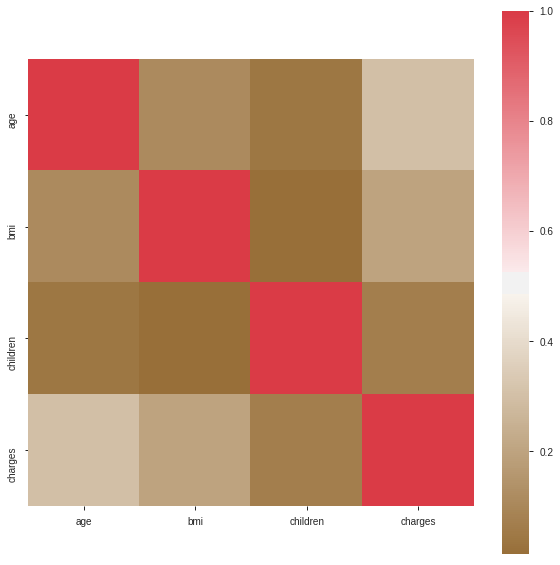

In [51]:
# plotting the correlation plot for the dataset

f, ax = plt.subplots(figsize = (10, 10))

corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

# *Data cleaning*



In [126]:
# removing unnecassary columns from the dataset
# side by side boxplot of with charges the median of 4 levels of region are almost have equal charges. so, i drop the region column.

data = data.drop('region', axis = 1) 
print(data.shape)

data.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [0]:
# label encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
data['sex'] = le.fit_transform(data['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
data['smoker'] = le.fit_transform(data['smoker'])

In [128]:
data['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [129]:
data['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [0]:
data['age'] = sc.fit_transform(data['age'].values.reshape(-1,1))
data['bmi'] = sc.fit_transform(data['bmi'].values.reshape(-1,1))


In [134]:
data.head()

,age,sex,bmi,children,smoker,charges
0,-1.438764,0,-0.453320,0,1,16884.92400
1,-1.509965,1,0.509621,1,0,1725.55230
2,-0.797954,1,0.383307,3,0,4449.46200
3,-0.441948,1,-1.305531,0,0,21984.47061
4,-0.513149,1,-0.292556,0,0,3866.85520


In [135]:
# splitting the dependent and independent variable

x = data.iloc[:,:5]
y = data.iloc[:,5]

print(x.shape)
print(y.shape)

(1338, 5)
(1338,)


In [136]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


## **Modelling**

**Linear Regression**

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
model = LinearRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)



MSE : 37057975.7833593
RMSE : 6087.5262449832035
r2 score : 0.7597585280148957


* 75.97 % of varaiance in charges is being explained by the model.

**Random Forest**

Hyper parameters tuning using GridSearchcv

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [20, 30, 40, 50]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)



In [149]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 555 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   30.9s finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 40}

In [150]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 110, n_jobs = -1,max_features=3,min_samples_leaf=5,min_samples_split=12,bootstrap=True)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 23180433.70299867
RMSE : 4814.606287433965
r2 score : 0.8497246167298158


**Decision Trees**

In [139]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 49052844.43049734
RMSE : 7003.773585039521
r2 score : 0.681997537589984


## After Feature Engineering with extra columns as bmi_30,	age_square.

In [66]:
df.head()

,sex,bmi,children,smoker,region,charges,bmi_30,age_square
0,female,27.900,0,yes,southwest,16884.92400,no,361
1,male,33.770,1,no,southeast,1725.55230,yes,324
2,male,33.000,3,no,southeast,4449.46200,yes,784
3,male,22.705,0,no,northwest,21984.47061,no,1089
4,male,28.880,0,no,northwest,3866.85520,no,1024


In [0]:
df.drop('age',axis=1,inplace=True)

In [0]:
df['sex'] = le.fit_transform(df['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df['bmi_30'] = le.fit_transform(df['bmi_30'])

In [0]:
df['bmi'] = sc.fit_transform(df['bmi'].values.reshape(-1, 1))
df['age_square'] = sc.fit_transform(df['age_square'].values.reshape(-1, 1))


In [0]:
df = pd.get_dummies(df,columns=['children','region'])

In [0]:
cols = ['sex', 'bmi', 'smoker', 'bmi_30', 'age_square', 'children_0',
       'children_1', 'children_2', 'children_3', 'children_4', 'children_5']
X = df[cols]
y = df['charges']

In [155]:
X.head()

,sex,bmi,smoker,bmi_30,age_square,children_0,children_1,children_2,children_3,children_4,children_5
0,0,-0.453320,1,0,-1.220462,1,0,0,0,0,0
1,1,0.509621,0,1,-1.253341,0,1,0,0,0,0
2,1,0.383307,0,1,-0.844579,0,0,0,1,0,0
3,1,-1.305531,0,0,-0.573551,1,0,0,0,0,0
4,1,-0.292556,0,0,-0.631311,1,0,0,0,0,0


In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 30)

In [167]:
model = LinearRegression()

# feeding the training data to the model
model.fit(X_train1, y_train1)

# predicting the test set results
y_pred = model.predict(X_test1)

# calculating the mean squared error
mse = np.mean((y_test1 - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test1, y_pred)
print("r2 score :", r2)


MSE : 33523829.882013533
RMSE : 5789.976673702022
r2 score : 0.768686903404534


In [170]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(X_train1, y_train1)

# predicting the test set results
y_pred = model.predict(X_test1)

# calculating the mean squared error
mse = np.mean((y_test1 - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test1, y_pred)
print("r2 score :", r2)

MSE : 47100232.30939098
RMSE : 6862.960899596542
r2 score : 0.6750102651100591


In [165]:
grid_search.fit(X_train1, y_train1)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   23.1s finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 30}

In [171]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 30, max_depth = 90, n_jobs = -1,max_features=3,min_samples_leaf=3,min_samples_split=10,bootstrap=True)

# feeding the training data to the model
model.fit(X_train1, y_train1)

# predicting the test set results
y_pred = model.predict(X_test1)

# calculating the mean squared error
mse = np.mean((y_test1 - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test1, y_pred)
print("r2 score :", r2)

MSE : 25032699.036051866
RMSE : 5003.26883507691
r2 score : 0.8272753694744703


* When we compare linear regression with decision tree of Rmse values Linear regression performs well.
* When we compare linear regression with Random forest of Rmse values Random forest performs well.
* overall if we require scoring or accuracy of the model Random forest is preferred.
* overall if we require interpretation of the model linear regression is preferred.